In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle

In [13]:
df = pd.read_csv(r'E:\step to ML\Repositries\Diabetes-Prediction-Deployment-master\Diabetes-Prediction-Deployment-master\kaggle_diabetes.csv')

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [16]:
features=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
features

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [17]:
df_copy = df.copy(deep=True)
#df_copy[features] = df_copy[features].replace(0,np.NaN)

In [18]:
df_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [19]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [20]:
Null_features=[feature for feature in df_copy.columns if df_copy[feature].isnull().sum()>0]
Null_features

[]

In [21]:
def give_averages(df):
    import numpy as np
    means=[]
    medians=[]
    modes=[]
    std_devs=[]
    for feature in df.columns:
        if df[feature].isnull().sum()>0:
            mean=df[feature].mean()
            mean=np.round_(mean)
            median=df[feature].median()
            median=np.round_(median)
            mode=df[feature].mode()
            mode=np.round_(mode)
            std_dev=df[feature].std()
            std_dev=np.round_(std_dev)
            means.append(mean)
            medians.append(median)
            modes.append(mode)
            std_devs.append(std_dev)
    stats=pd.DataFrame(list(zip(means,medians,modes,std_devs)),columns=["mean","medain","mode","stdandard_deviation"])
    return stats

In [22]:
df_avg=give_averages(df_copy)
df_avg

,mean,medain,mode,stdandard_deviation


In [23]:
#df_copy[Null_features].describe()

In [24]:
# # Replacing NaN value by mean, median depending upon distribution
# df_copy['Glucose'].fillna(df_copy['Glucose'].median(), inplace=True)
# df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median(), inplace=True)
# df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
# df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
# df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

In [25]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [26]:
X.shape,y.shape

((2000, 8), (2000,))

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
model_scoring={}
def all_model_scores(model,X,y):
    scores=cross_val_score(model,X,y,cv=10)
    mean_score=scores.mean()
    model_scoring.update({model:mean_score})
    return model_scoring
Model_list=[DecisionTreeClassifier(),LogisticRegression(solver='lbfgs', max_iter=1000),RandomForestClassifier(),SVC()]
for model in Model_list:
    score_dict=all_model_scores(model,X,y)
df_Models_scores=pd.DataFrame(score_dict,index=[0])
df_Models_scores

,DecisionTreeClassifier(),LogisticRegression(max_iter=1000),RandomForestClassifier(),SVC()
0,0.9915,0.7795,0.9945,0.7685


In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [37]:
# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
# from sklearn.tree import DecisionTreeClassifier
# classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=20)

In [38]:
classifier.score(X_test,y_test)

0.9875

In [39]:
from sklearn import metrics
model=classifier
y_predicted=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.9875
Precision: 1.0
Recall: 0.9609375


In [40]:
from sklearn import metrics
score=metrics.accuracy_score(y_test,y_predicted)
pre=metrics.precision_score(y_test, y_predicted)
recall=metrics.recall_score(y_test, y_predicted)
f1_score=2*pre*recall/(pre+recall)
print(f1_score)

0.9800796812749004


In [41]:
from sklearn.metrics import classification_report
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       272
           1       1.00      0.96      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.99       400
weighted avg       0.99      0.99      0.99       400



In [42]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[272,   0],
       [  5, 123]], dtype=int64)

Text(69.0, 0.5, 'Truth')

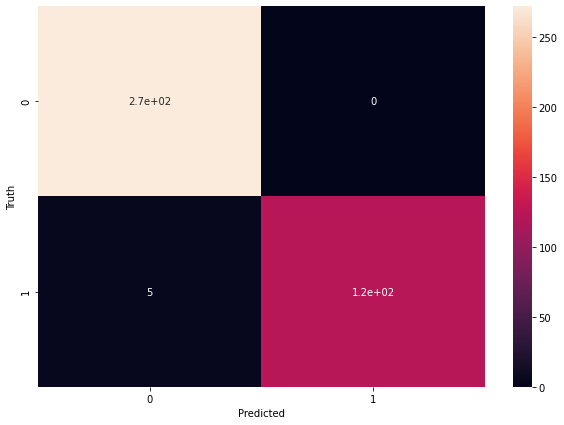

In [43]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')